In [4]:
import matplotlib.pyplot as plt
from BigM import BigM
from BigM import graph
from BigM import InputHandling
import numpy as np
from scipy.optimize import linprog

/home/rikato/Code+Notes/MC_Lab/.venv/lib/python3.11/site-packages/BigM/simplex.py:73: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  iteration["operations"][pivot["position"]
/home/rikato/Code+Notes/MC_Lab/.venv/lib/python3.11/site-packages/B

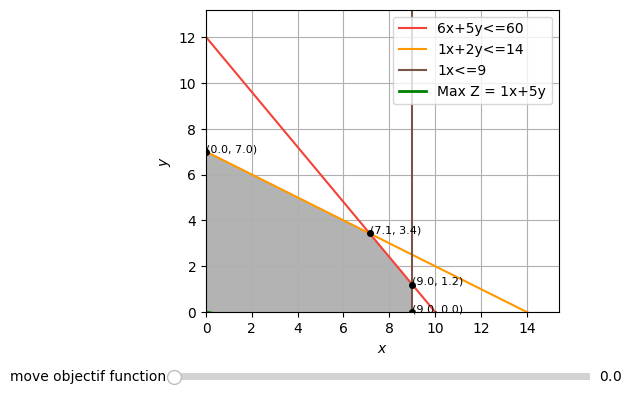

In [5]:
# Define the linear programming problem in standard form
# "Max Z = x+5y" is the objective function to be maximized
# The following lines are constraints for the problem
lp = [
    "Max Z = x+5y",  # Objective function: Maximize Z which is x + 5*y
    "6x+5y<=60",     # Constraint 1: 6*x + 5*y must be less than or equal to 60
    "x+2y<=14",      # Constraint 2: x + 2*y must be less than or equal to 14
    "x<=9"           # Constraint 3: x must be less than or equal to 9
]

# Create a BigM method object
bm = BigM.BigM()

formattedInput = np.array(InputHandling.formatUserInput(lp))

# Solve the linear programming problem using the Big M method
# The results will include the optimal values for the variables and the maximum value of Z
results = bm.runBigM(formattedInput)

# Draw the graph of the feasible region and the objective function
# The 'slider=True' argument suggests that a slider will be included in the graph
graph.drawGraph(formattedInput, slider=True)


In [6]:
# Define the coefficients of the objective function
# Since the 'linprog' function minimizes by default, the coefficients are negated
# to turn the maximization problem into a minimization problem
obj = [-5, 3, 4, -7]  # Objective function: Minimize (-5x1 + 3x2 + 4x3 - 7x4)

# Define the left-hand side coefficients of the inequality constraints
lhs = [
    [1, 1, 1, 1],  # Constraint 1 coefficients: x1 + x2 + x3 + x4
    [1, 0, 1, 0],  # Constraint 2 coefficients: x1 + x3
    [2, 1, 1, 0]   # Constraint 3 coefficients: 2x1 + x2 + x3
]

# Define the right-hand side values of the inequality constraints
rhs = [14, 7, 13]  # Constraints values: [14, 7, 13]

# Define the variable bounds for each variable (non-negative and no upper limit)
# This is required because by default variables are assumed to be non-negative
# (0 to positive infinity)
bnd = [(0, float('inf')),  # Bound for x1
       (0, float('inf')),  # Bound for x2
       (0, float('inf')),  # Bound for x3
       (0, float('inf'))]  # Bound for x4

# Perform the linear programming optimization using the simplex method
# 'c' contains the coefficients for the objective function
# 'A_ub' and 'b_ub' define the inequality constraints (Ax <= b)
# 'bounds' defines the variable bounds (e.g., x >= 0)
# 'method' specifies the algorithm to use, 'simplex' indicates the two-phase simplex method
optimize = linprog(c=obj,
                   A_ub=lhs,
                   b_ub=rhs,
                   bounds=bnd,
                   method='simplex')

# Display the results of the optimization
print(optimize)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -98.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  1.400e+01]
     nit: 7


/tmp/ipykernel_2121539/1904729271.py:29: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  optimize = linprog(c=obj,
